In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 15:43:35] [setup] RAM Tracking...
[codecarbon INFO @ 15:43:35] [setup] CPU Tracking...
[codecarbon WARNING @ 15:43:38] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 15:43:39] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 15:43:39] [setup] GPU Tracking...
[codecarbon INFO @ 15:43:39] No GPU found.
[codecarbon INFO @ 15:43:39] >>> Tracker's metadata:
[codecarbon INFO @ 15:43:39]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 15:43:39]   Python version: 3.9.12
[codecarbon INFO @ 15:43:39]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 15:43:39]   Available RAM : 8.000 GB
[codecarbon INFO @ 15:43:39]   CPU count: 8
[codecarbon INFO @ 15:43:39]   CPU model: Apple M1
[codecarbon INFO @ 15:43:39]   GPU count: None
[codecarbon INFO @ 15:43:39]   GPU model: None
[codecarbon INFO @ 15:43:42] Saving emissions data to

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/trisha2094/weatheraus/versions/1/weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [8]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [9]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera   

In [10]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


DATE

In [11]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [13]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [14]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [15]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [16]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [22]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
#20% test, 80% training
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [25]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [26]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [27]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [28]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [29]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [30]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [31]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [32]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [33]:
cols = X_train.columns

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [36]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [37]:
from sklearn.tree import DecisionTreeClassifier

CRITERIO DE GINI

In [38]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
y_pred_gini = clf_gini.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8284


In [41]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8278


In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8278
Test set score: 0.8284


[Text(0.5, 0.875, 'X[9] <= 0.715\ngini = 0.348\nsamples = 113754\nvalue = [88249, 25505]'),
 Text(0.25, 0.625, 'X[9] <= 0.515\ngini = 0.25\nsamples = 94949\nvalue = [81051, 13898]'),
 Text(0.125, 0.375, 'X[4] <= 0.534\ngini = 0.148\nsamples = 54485\nvalue = [50095, 4390]'),
 Text(0.0625, 0.125, 'gini = 0.348\nsamples = 6429\nvalue = [4986, 1443]'),
 Text(0.1875, 0.125, 'gini = 0.115\nsamples = 48056\nvalue = [45109, 2947]'),
 Text(0.375, 0.375, 'X[5] <= 0.333\ngini = 0.36\nsamples = 40464\nvalue = [30956, 9508]'),
 Text(0.3125, 0.125, 'gini = 0.308\nsamples = 33501\nvalue = [27117, 6384]'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 6963\nvalue = [3839, 3124]'),
 Text(0.75, 0.625, 'X[9] <= 0.835\ngini = 0.473\nsamples = 18805\nvalue = [7198, 11607]'),
 Text(0.625, 0.375, 'X[5] <= 0.302\ngini = 0.499\nsamples = 10957\nvalue = [5711, 5246]'),
 Text(0.5625, 0.125, 'gini = 0.48\nsamples = 7536\nvalue = [4523, 3013]'),
 Text(0.6875, 0.125, 'gini = 0.453\nsamples = 3421\nvalue = [1188, 22

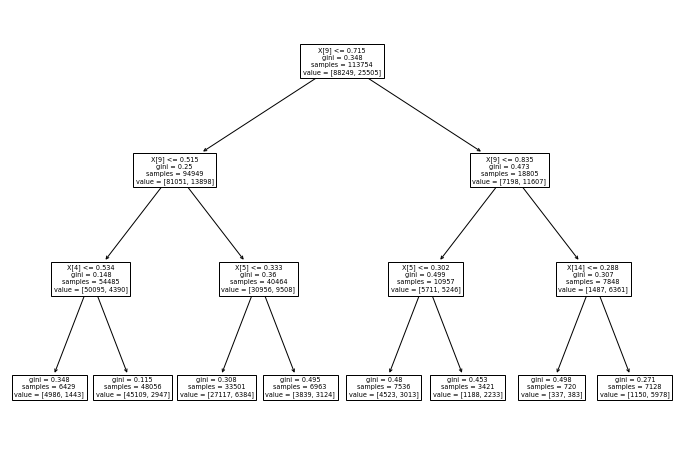

In [44]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

CRITERIO DE ENTROPÍA

In [45]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
y_pred_en = clf_en.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8302


In [48]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8283


In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8283
Test set score: 0.8302


[Text(0.5, 0.875, 'X[9] <= 0.665\nentropy = 0.768\nsamples = 113754\nvalue = [88249, 25505]'),
 Text(0.25, 0.625, 'X[9] <= 0.515\nentropy = 0.557\nsamples = 87537\nvalue = [76167, 11370]'),
 Text(0.125, 0.375, 'X[4] <= 0.534\nentropy = 0.404\nsamples = 54485\nvalue = [50095, 4390]'),
 Text(0.0625, 0.125, 'entropy = 0.768\nsamples = 6429\nvalue = [4986, 1443]'),
 Text(0.1875, 0.125, 'entropy = 0.333\nsamples = 48056\nvalue = [45109, 2947]'),
 Text(0.375, 0.375, 'X[5] <= 0.318\nentropy = 0.744\nsamples = 33052\nvalue = [26072, 6980]'),
 Text(0.3125, 0.125, 'entropy = 0.648\nsamples = 26641\nvalue = [22226, 4415]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 6411\nvalue = [3846, 2565]'),
 Text(0.75, 0.625, 'X[9] <= 0.815\nentropy = 0.996\nsamples = 26217\nvalue = [12082, 14135]'),
 Text(0.625, 0.375, 'X[5] <= 0.279\nentropy = 0.975\nsamples = 17082\nvalue = [10111, 6971]'),
 Text(0.5625, 0.125, 'entropy = 0.903\nsamples = 10839\nvalue = [7382, 3457]'),
 Text(0.6875, 0.125, 'entropy 

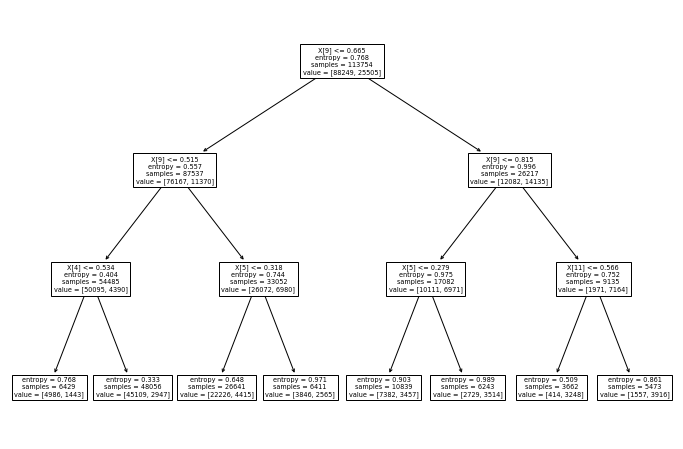

In [51]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_en)

# Calcular la accuracy manualmente
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy (manual calculation):", accuracy)

# Calcular la accuracy con sklearn (más general para cualquier número de clases)
accuracy_sklearn = accuracy_score(y_test, y_pred_en)
print("Accuracy (sklearn):", accuracy_sklearn)


Accuracy (manual calculation): 0.8301628045993178
Accuracy (sklearn): 0.8301628045993178


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

          No       0.85      0.95      0.90     22067
         Yes       0.70      0.43      0.53      6372

    accuracy                           0.83     28439
   macro avg       0.77      0.69      0.71     28439
weighted avg       0.82      0.83      0.81     28439



In [54]:
from sklearn.metrics import recall_score, f1_score

# Calcular Sensibilidad (Recall)
recall = recall_score(y_test, y_pred_en, pos_label='Yes')
print("Sensibilidad (Recall):", recall)

# Calcular F1-score
f1 = f1_score(y_test, y_pred_en, pos_label='Yes')
print("F1 Score:", f1)


Sensibilidad (Recall): 0.42984934086629
F1 Score: 0.5314318975552969


In [55]:
import numpy as np
from sklearn.metrics import roc_auc_score  # Importa la función

# Convertir etiquetas 'Yes' y 'No' a 1 y 0 usando numpy
y_test_bin = np.where(y_test == 'Yes', 1, 0)
y_pred_bin = np.where(y_pred_en == 'Yes', 1, 0)

# Calcular AUC
auc_score = roc_auc_score(y_test_bin, y_pred_bin)
print("AUC Score (aproximado):", auc_score)



AUC Score (aproximado): 0.6878027236347583


In [56]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 15:43:51] Energy consumed for RAM : 0.000007 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:43:51] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:43:51] 0.000019 kWh of electricity used since the beginning.


3.930665747597127e-06